In [17]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

In [18]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [19]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [20]:
INSTITUTION_ID = "ins_109508"

In [21]:
from plaid import Client
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [22]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [23]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [56]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'ZVn3K9anAkiGaaeNWpzkiGZJGEmrVKIg1ygQl',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'MMQkeLJQVnhG44mBoz79iGErG5MK9qI9Rg9n1',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '1pgnjvQgBAcWMM98m6r7tZwLZPzd5pu5Pd5WP',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [57]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "LZe871JewAFjNNeq4XybIjx5jmqybNfPWnPD6",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2019-09-28",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction_id": "Pp1GMgJ1A

### 2. Print the categories for each transaction

In [58]:
for transactions in transaction_response['transactions']:
    if transactions['category'] != "":
        print(json.dumps(transactions['category'][0], indent=4, sort_keys=True))

"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [59]:
#create dataframe from PLaid transaction response
df = pd.DataFrame(transaction_response['transactions'], columns=['date','name','amount','category'])
df = df.set_index('date')
#use date as index, convert to datatime
df.index = pd.to_datetime(df.index)

#change data types
df['amount'] = df['amount'].astype(float)

#take first item from category label
df['category'] = df['category'].apply(lambda x: x[0])

#add month column to dataframe and change it from month int to the month short name
df['month'] = pd.DatetimeIndex(df.index).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df

,name,amount,category,month
date,,,,
2019-09-28,Tectra Inc,500.00,Food and Drink,Sep
2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment,Sep
2019-09-27,KFC,500.00,Food and Drink,Sep
2019-09-27,Madison Bicycle Shop,500.00,Shops,Sep
2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment,Sep
2019-09-18,Uber 063015 SF**POOL**,5.40,Travel,Sep
2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer,Sep
2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer,Sep
2019-09-16,Touchstone Climbing,78.50,Recreation,Sep


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [60]:
#Use Plaid's inbuilt income analysis to determine income stats
income_response = client.Income.get(access_token)
previous_year_gross_income = (income_response['income']['last_year_income_before_tax'])
current_monthly_income = (income_response['income']['income_streams'][0]['monthly_income'])
projected_yearly_income = (income_response['income']['projected_yearly_income'])

print(f"1. Previous year's gross income was ${previous_year_gross_income}")
print(f"2. Current monthly income is ${current_monthly_income}")
print(f"3. Projected yearly income is ${projected_yearly_income}")

1. Previous year's gross income was $7285
2. Current monthly income is $500
3. Projected yearly income is $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

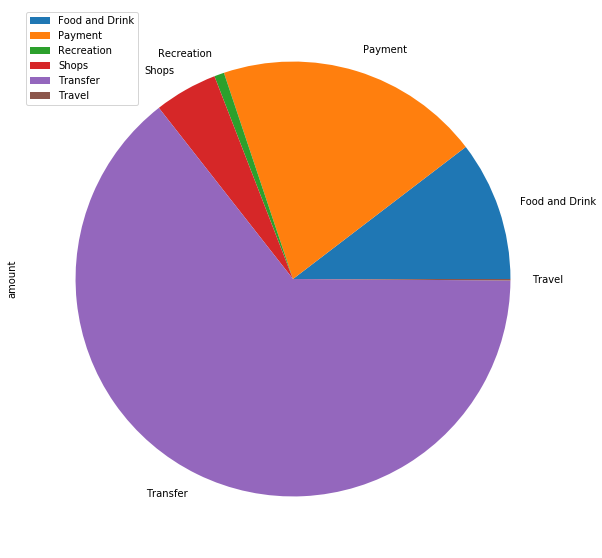

In [61]:
#group expenses by categoory and plot
expenses_per_category = df.groupby(["category"]).sum()
expenses_per_category.plot(kind='pie', subplots=True, figsize = (20,10))
plt.savefig('pie.png')

In [62]:
#print expenses by category for MD
print(tabulate(expenses_per_category, headers = ["Category", "Amount"],numalign="right",floatfmt=".2f",tablefmt="pipe"))

| Category       |   Amount |
|:---------------|---------:|
| Food and Drink |  3317.19 |
| Payment        |  6310.50 |
| Recreation     |   235.50 |
| Shops          |  1500.00 |
| Transfer       | 20537.34 |
| Travel         |    35.19 |


### Calculate the expenses per month

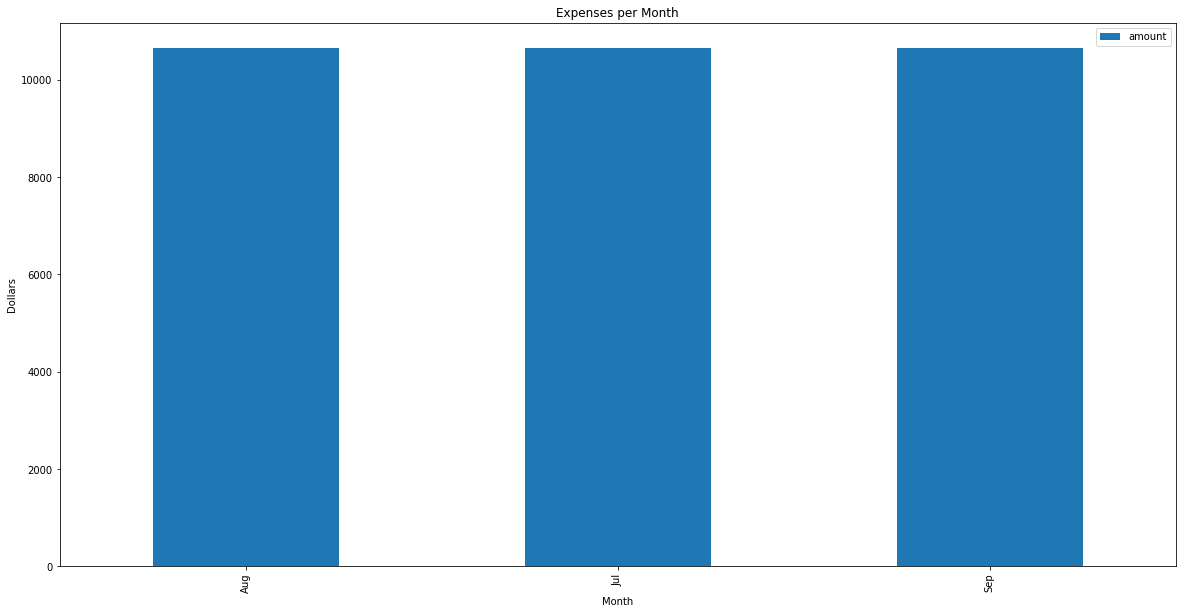

In [63]:
#group expenses by month and plot
expenses_per_month = df.groupby(['month']).sum()
epm=expenses_per_month.plot(kind='bar',figsize =(20,10))
epm.set_title("Expenses per Month")
epm.set_xlabel("Month")
epm.set_ylabel("Dollars")
epm.figure.savefig('expenses.png')

In [64]:
#print table for MD
print(tabulate(expenses_per_month, headers = ["Category", "Amount"],numalign="right",floatfmt=".2f",tablefmt="pipe"))

| Category   |   Amount |
|:-----------|---------:|
| Aug        | 10645.24 |
| Jul        | 10645.24 |
| Sep        | 10645.24 |
